# Essentia Python examples

This Jupyter notebook demonstrates various typical examples of using Essentia in Python.

Let's first import all required modules that will be used in these examples.

In [1]:
%matplotlib inline

In [2]:
import essentia
import essentia.standard as es

import numpy

# For embedding audio player
import IPython

# Plots
import matplotlib.pyplot as plt
from pylab import plot, show, figure, imshow
plt.rcParams['figure.figsize'] = (15, 6) # Set plot sizes to something larger than default

## Loading audio
Essentia is relying on FFMpeg for its audio I/O, so there are many possibilities when it comes to loading audio. See the algorithms description for all of them. Below are only some example.

In [3]:
filename = 'audio/dubstep.flac'

In [4]:
# Load the whole file in mono
audio = es.MonoLoader(filename=filename)()
print(audio.shape)

(302085,)


In [5]:
# Load the whole file in stereo
audio, _, _, _, _, _ = es.AudioLoader(filename=filename)()
print(audio.shape)

(302085, 2)


In [6]:
# Load and resample to 16000 Hz
audio = es.MonoLoader(filename=filename, sampleRate=16000)()
print(audio.shape)

(109600,)


In [7]:
# Load only a 10-seconds segment in mono, starting from the 2nd minute
audio = es.EasyLoader(filename='audio/Vivaldi_Sonata_5_II_Allegro.flac', 
                            sampleRate=44100, startTime=60, endTime=70)()
print(audio.shape)

(441000,)


## Reading file metadata

Essentia also supports loading the ID3 metadata contained in the files using [MetadataReader](https://essentia.upf.edu/documentation/reference/std_MetadataReader.html)

In [8]:
# Replace with your own file
es.MetadataReader(filename='audio/Mr. Bungle - Stubb (a Dub).mp3')()

('Stubb (a Dub)',
 'Mr. Bungle',
 'Mr. Bungle',
 '',
 'Avantgarde Metal',
 '6/10',
 '1991-08-13',
 439,
 160,
 44100,
 2)

The output contains standard metadata fields (track name, artist, name, album name, track number, etc.) as well as bitrate and samplerate. It also includes an Essentia pool object containing all other fields found:

In [9]:
metadata_pool = es.MetadataReader(filename='audio/Mr. Bungle - Stubb (a Dub).mp3')()[7]
for d in metadata_pool.descriptorNames():
    print(d, metadata_pool[d])

metadata.tags.album ['Mr. Bungle']
metadata.tags.albumartist ['Mr. Bungle']
metadata.tags.albumartistsort ['Mr. Bungle']
metadata.tags.artist ['Mr. Bungle']
metadata.tags.artists ['Mr. Bungle']
metadata.tags.artistsort ['Mr. Bungle']
metadata.tags.asin ['B000002LPW']
metadata.tags.barcode ['075992664028']
metadata.tags.catalognumber ['9 26640-2']
metadata.tags.composer ['Mr. Bungle']
metadata.tags.date ['1991-08-13']
metadata.tags.discnumber ['1/1']
metadata.tags.genre ['Avantgarde Metal']
metadata.tags.isrc ['USWB19903997']
metadata.tags.label ['Warner Bros. Records']
metadata.tags.media ['CD']
metadata.tags.musicbrainz album release country ['US']
metadata.tags.musicbrainz album status ['official']
metadata.tags.musicbrainz album type ['album']
metadata.tags.musicbrainz release track id ['64236797-30a7-3dab-8398-eea09e92218d']
metadata.tags.musicbrainz_albumartistid ['277e21a9-2d64-452d-96c4-2d23a7af5891']
metadata.tags.musicbrainz_albumid ['6e2a6ac8-e3b0-4992-b107-3968f2ddcad6']
met

## Computing features with MusicExtractor

[MusicExtractor](http://essentia.upf.edu/documentation/reference/std_MusicExtractor.html) is a multi-purpose algorithm for feature extraction from files (see the complete list of computed features [here](http://essentia.upf.edu/documentation/streaming_extractor_music.html)). It combines many algorithms and is also used inside the Essentia's command-line Music Extractor. For any given input filename, all computed features are stored in two output Pools which you can access for your needs or store to a file. One of the pools contains raw frames data, while another one contains aggregated statistics across frames.

In [10]:
# This is how the audio we want to process sounds like
IPython.display.Audio('audio/dubstep.flac')

In [11]:
# Compute all features, aggregate only 'mean' and 'stdev' statistics for all low-level, rhythm and tonal frame features
features, features_frames = es.MusicExtractor(lowlevelStats=['mean', 'stdev'], 
                                              rhythmStats=['mean', 'stdev'], 
                                              tonalStats=['mean', 'stdev'])('audio/dubstep.flac')

# See all feature names in the pool in a sorted order
print(sorted(features.descriptorNames()))


['lowlevel.average_loudness', 'lowlevel.barkbands.mean', 'lowlevel.barkbands.stdev', 'lowlevel.barkbands_crest.mean', 'lowlevel.barkbands_crest.stdev', 'lowlevel.barkbands_flatness_db.mean', 'lowlevel.barkbands_flatness_db.stdev', 'lowlevel.barkbands_kurtosis.mean', 'lowlevel.barkbands_kurtosis.stdev', 'lowlevel.barkbands_skewness.mean', 'lowlevel.barkbands_skewness.stdev', 'lowlevel.barkbands_spread.mean', 'lowlevel.barkbands_spread.stdev', 'lowlevel.dissonance.mean', 'lowlevel.dissonance.stdev', 'lowlevel.dynamic_complexity', 'lowlevel.erbbands.mean', 'lowlevel.erbbands.stdev', 'lowlevel.erbbands_crest.mean', 'lowlevel.erbbands_crest.stdev', 'lowlevel.erbbands_flatness_db.mean', 'lowlevel.erbbands_flatness_db.stdev', 'lowlevel.erbbands_kurtosis.mean', 'lowlevel.erbbands_kurtosis.stdev', 'lowlevel.erbbands_skewness.mean', 'lowlevel.erbbands_skewness.stdev', 'lowlevel.erbbands_spread.mean', 'lowlevel.erbbands_spread.stdev', 'lowlevel.gfcc.cov', 'lowlevel.gfcc.icov', 'lowlevel.gfcc.mean

You can then access particular values in the pools:

In [12]:
print("Filename:", features['metadata.tags.file_name'])
print("-"*80)
print("Replay gain:", features['metadata.audio_properties.replay_gain'])
print("EBU128 integrated loudness:", features['lowlevel.loudness_ebu128.integrated'])
print("EBU128 loudness range:", features['lowlevel.loudness_ebu128.loudness_range'])
print("-"*80)
print("MFCC mean:", features['lowlevel.mfcc.mean'])
print("-"*80)
print("BPM:", features['rhythm.bpm'])
print("Beat positions (sec.)", features['rhythm.beats_position'])
print("-"*80)
print("Key/scale estimation (using a profile specifically suited for electronic music):", 
      features['tonal.key_edma.key'], features['tonal.key_edma.scale'])
    

Filename: dubstep.flac
--------------------------------------------------------------------------------
Replay gain: -13.708173751831055
EBU128 integrated loudness: -10.151906967163086
EBU128 loudness range: 0.6067428588867188
--------------------------------------------------------------------------------
MFCC mean: [-670.24206543   84.12042999   24.2650795    -4.50016546    8.46714878
   -1.34411359    6.50992203    9.55177975    1.56418681    9.28142452
   -0.72323143    5.44626284   -4.21891975]
--------------------------------------------------------------------------------
BPM: 139.98114013671875
Beat positions (sec.) [ 0.42956915  0.85913831  1.30031741  1.71827662  2.14784575  2.57741499
  2.9953742   3.42494321  3.86612248  4.29569149  4.72526073  5.15482998
  5.58439922  6.01396799  6.4319272 ]
--------------------------------------------------------------------------------
Key/scale estimation (using a profile specifically suited for electronic music): A minor


## Beat detection and BPM histogram

In this example we are going to look at how to perform beat tracking using [RhythmExtractor2013](http://essentia.upf.edu/documentation/reference/std_RhythmExtractor2013.html), mark the extractred beats on the audio using the [AudioOnsetsMarker](http://essentia.upf.edu/documentation/reference/std_AudioOnsetsMarker.html) algorithm and write those to file using [MonoWriter](http://essentia.upf.edu/documentation/reference/std_MonoWriter.html).


In [13]:
# Loading audio file
audio = es.MonoLoader(filename='audio/dubstep.flac')()

# Compute beat positions and BPM
rhythm_extractor = es.RhythmExtractor2013(method="multifeature")
bpm, beats, beats_confidence, _, beats_intervals = rhythm_extractor(audio)

print("BPM:", bpm)
print("Beat positions (sec.):", beats)
print("Beat estimation confidence:", beats_confidence)

# Mark beat positions on the audio and write it to a file
# Let's use beeps instead of white noise to mark them, as it's more distinctive
marker = es.AudioOnsetsMarker(onsets=beats, type='beep')
marked_audio = marker(audio)
es.MonoWriter(filename='audio/dubstep_beats.mp3')(marked_audio)

BPM: 139.98114013671875
Beat positions (sec.): [ 0.42956915  0.85913831  1.30031741  1.71827662  2.14784575  2.57741499
  2.9953742   3.42494321  3.86612248  4.29569149  4.72526073  5.15482998
  5.58439922  6.01396799  6.4319272 ]
Beat estimation confidence: 3.9443612098693848


We can now listen to the resulting audio with beats marked by beeps. We can also visualize beat estimations.

In [14]:
IPython.display.Audio('audio/dubstep_beats.mp3')

Text(0.5, 1.0, 'Audio waveform and the estimated beat positions')

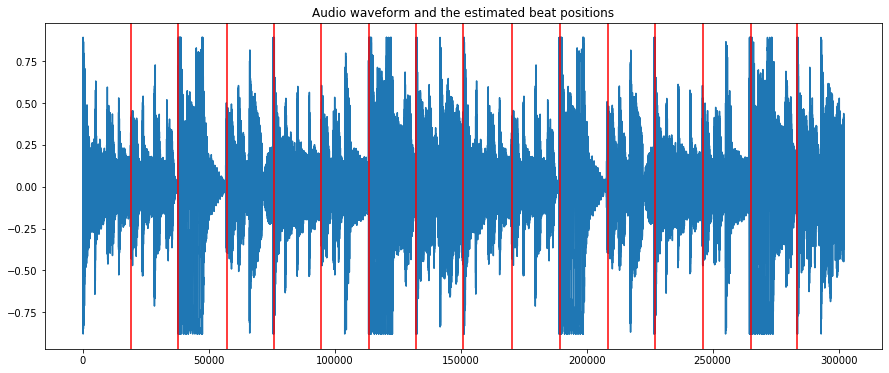

In [15]:
plot(audio)
for beat in beats:
    plt.axvline(x=beat*44100, color='red')

plt.title("Audio waveform and the estimated beat positions")

The BPM value output by RhythmExtactor2013 is the average of all BPM estimates done for each interval between two consecutive beats. Alternatively, we could analyze the distribution of all those intervals using [BpmHistogramDescriptors](http://essentia.upf.edu/documentation/reference/std_BpmHistogramDescriptors.html). This would especially make sense for music with a varying rhythm (which is not the case in our example, but anyways...).

Overall BPM (estimated before): 140.0
First histogram peak: 140.0 bpm
Second histogram peak: 0.0 bpm


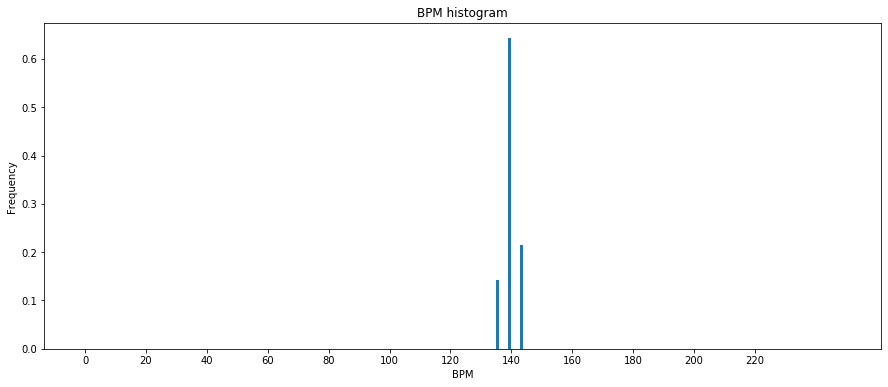

In [18]:
peak1_bpm, peak1_weight, peak1_spread,\
peak2_bpm, peak2_weight, peak2_spread, histogram = es.BpmHistogramDescriptors()(beats_intervals)

print("Overall BPM (estimated before): %0.1f" % bpm)
print("First histogram peak: %0.1f bpm" % peak1_bpm)
print("Second histogram peak: %0.1f bpm" % peak2_bpm)

fig, ax = plt.subplots()
ax.bar(range(len(histogram)), histogram, width=1)
ax.set_xlabel('BPM')
ax.set_ylabel('Frequency')
plt.title("BPM histogram")
ax.set_xticks([20 * x + 0.5 for x in range(int(len(histogram) / 20))])
ax.set_xticklabels([str(20 * x) for x in range(int(len(histogram) / 20))])
plt.show()

Of course, such histograms will especially make sense for music with a varying rhythm, which is not the case in the previous example. 

Here is another example of the BMP histogram, this time for the song ["Stubb (A Dub)" by Mr Bungle](https://www.youtube.com/watch?v=-RBSrUtX0bA). Note how average BPM estimation differs from other peaks that can be seen in the histogram.

Overall average BPM: 118.0
First histogram peak: 117.0 bpm
Second histogram peak: 152.0 bpm


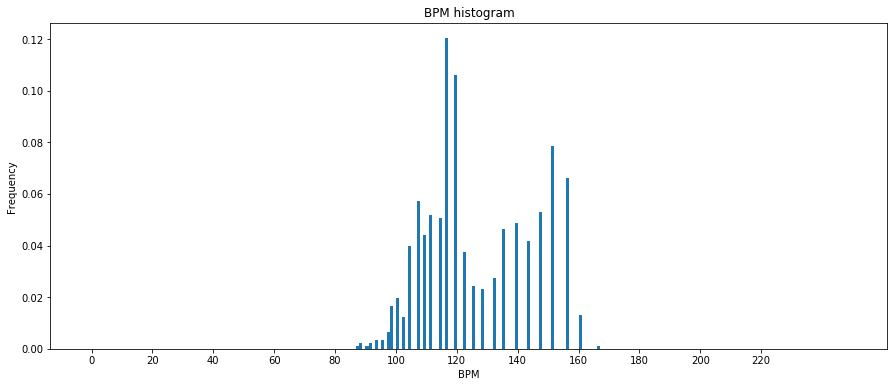

In [20]:
audio = es.MonoLoader(filename='audio/Mr. Bungle - Stubb (a Dub).mp3')()
rhythm_extractor = es.RhythmExtractor2013(method="multifeature")
bpm, beats, beats_confidence, _, beats_intervals = rhythm_extractor(audio)

peak1_bpm, peak1_weight, peak1_spread,\
peak2_bpm, peak2_weight, peak2_spread, histogram = es.BpmHistogramDescriptors()(beats_intervals)

print("Overall average BPM: %0.1f" % bpm)
print("First histogram peak: %0.1f bpm" % peak1_bpm)
print("Second histogram peak: %0.1f bpm" % peak2_bpm)

fig, ax = plt.subplots()
ax.bar(range(len(histogram)), histogram, width=1)
ax.set_xlabel('BPM')
ax.set_ylabel('Frequency')
plt.title("BPM histogram")
ax.set_xticks([20 * x + 0.5 for x in range(int(len(histogram) / 20))])
ax.set_xticklabels([str(20 * x) for x in range(int(len(histogram) / 20))])
plt.show()

### Percival BPM estimator

Alternatively, there is another algorithm for BPM estimation, [PercivalBpmEstimator](https://essentia.upf.edu/documentation/reference/std_PercivalBpmEstimator.html), which is designed for signals with constant or near-constant tempo. In our experience it may work better for short loops. 

In [21]:
audio = es.MonoLoader(filename='audio/dubstep.flac')()
bpm = es.PercivalBpmEstimator()(audio)
print("BPM:", bpm)

BPM: 140.14830017089844


## Onset detection

In this example we are going to look at how to perform onset detection and mark onsets on the audio using the [AudioOnsetsMarker](http://essentia.upf.edu/documentation/reference/std_AudioOnsetsMarker.html) algorithm.

Onset detection consists of two main phases:
- Compute an onset detection function, which is a function describing the evolution of some parameters, which might be representative of whether we might find an onset or not
- Decide onset locations in the signal based on a number of these detection functions

The [OnsetDetection](http://essentia.upf.edu/documentation/reference/std_OnsetDetection.html) algorithm estimates various onset detection functions for an audio frame given its spectrum. [Onsets](http://essentia.upf.edu/documentation/reference/std_Onsets.html) detects onsets given a matrix with values of onset detection functions in each frame.

It might be hard to hear the sound of hihats as it gets masked by the onset beeps in the mono signal. As an alternative, we can store both the original sound and the beeps in a stereo signal putting them separately into left and right channels using [StereoMuxer](http://essentia.upf.edu/documentation/reference/std_StereoMuxer.html) and [AudioWriter](http://essentia.upf.edu/documentation/reference/std_AudioWriter.html).


In [24]:
# Loading audio file
audio = es.MonoLoader(filename='audio/hiphop.mp3')()

# Phase 1: compute the onset detection function
# The OnsetDetection algorithm provides various onset detection functions. Let's use two of them.

od1 = es.OnsetDetection(method='hfc')
od2 = es.OnsetDetection(method='complex')

# Let's also get the other algorithms we will need, and a pool to store the results
w = es.Windowing(type = 'hann')
fft = es.FFT() # this gives us a complex FFT
c2p = es.CartesianToPolar() # and this turns it into a pair (magnitude, phase)
pool = es.essentia.Pool()

# Computing onset detection functions.
for frame in es.FrameGenerator(audio, frameSize = 1024, hopSize = 512):
    mag, phase, = c2p(fft(w(frame)))
    pool.add('features.hfc', od1(mag, phase))
    pool.add('features.complex', od2(mag, phase))

# Phase 2: compute the actual onsets locations
onsets = es.Onsets()

onsets_hfc = onsets(# this algo expects a matrix, not a vector
                    essentia.array([ pool['features.hfc'] ]),

                    # you need to specify weights, but as there is only a single
                    # function, it doesn't actually matter which weight you give it
                    [ 1 ])

onsets_complex = onsets(essentia.array([ pool['features.complex'] ]), [ 1 ])


# Mark onsets on the audio, which we'll write back to disk
# We use beeps instead of white noise and stereo signal as it's more distinctive

silence = [0.] * len(audio)

beeps_hfc = es.AudioOnsetsMarker(onsets=onsets_hfc, type='beep')(silence)
es.AudioWriter(filename='audio/hiphop_onsets_hfc_stereo.mp3', format='mp3')(es.StereoMuxer()(audio, beeps_hfc))

beeps_complex = es.AudioOnsetsMarker(onsets=onsets_complex, type='beep')(silence)
es.AudioWriter(filename='audio/hiphop_onsets_complex_stereo.mp3', format='mp3')(es.StereoMuxer()(audio, beeps_complex))

We can now go listen to the resulting audio files to see which onset detection function works better.

In [25]:
IPython.display.Audio('audio/hiphop.mp3')

In [26]:
IPython.display.Audio('audio/hiphop_onsets_hfc_stereo.mp3')

In [27]:
IPython.display.Audio('audio/hiphop_onsets_complex_stereo.mp3')

Finally, inspecting the plots with onsets marked by vertical lines, we can easily see how the HFC method picks up the highhats, which the complex method also detects the kicks.

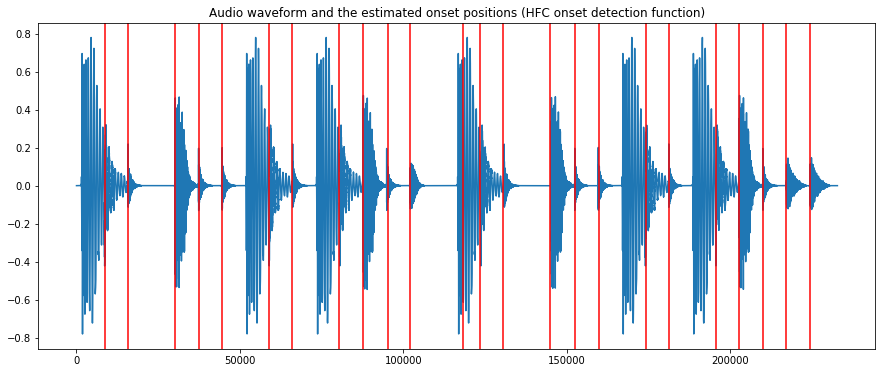

Text(0.5, 1.0, 'Audio waveform and the estimated onset positions (complex onset detection function)')

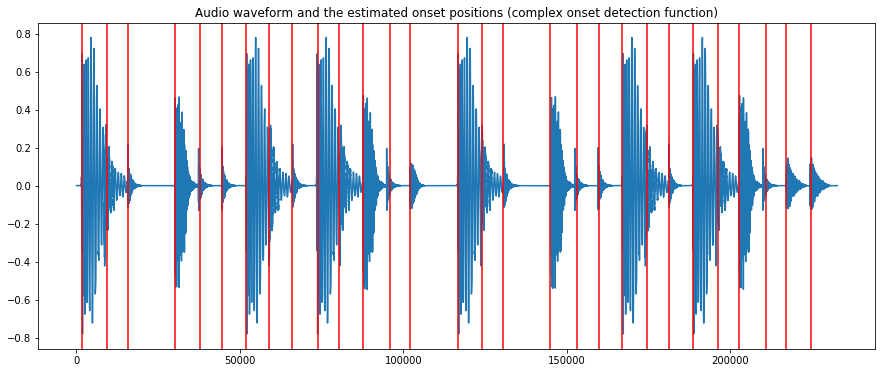

In [28]:
plot(audio)
for onset in onsets_hfc:
    plt.axvline(x=onset*44100, color='red')

plt.title("Audio waveform and the estimated onset positions (HFC onset detection function)")
plt.show()

plot(audio)
for onset in onsets_complex:
    plt.axvline(x=onset*44100, color='red')

plt.title("Audio waveform and the estimated onset positions (complex onset detection function)")

## Melody detection
In this example we will analyse the pitch contour of the predominant melody in an audio recording using the [PredominantPitchMelodia](http://essentia.upf.edu/documentation/reference/std_PredominantPitchMelodia.html) algorithm. This algorithm outputs a time series (sequence of values) with the instantaneous pitch value (in Hertz) of the perceived melody. It can be used with both monophonic and polyphonic signals.

Duration of the audio sample [sec]: 14.22859410430839


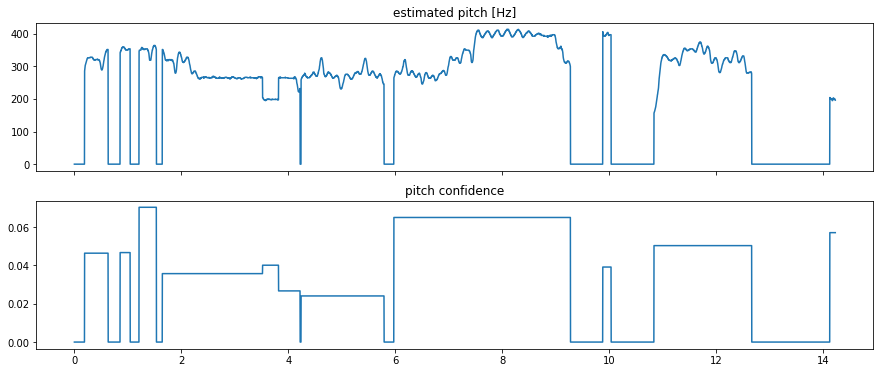

In [29]:
# Load audio file; it is recommended to apply equal-loudness filter for PredominantPitchMelodia 
loader = es.EqloudLoader(filename='audio/flamenco.flac', sampleRate=44100)

audio = loader()
print("Duration of the audio sample [sec]:", len(audio)/44100.0)

# Extract the pitch curve
# PitchMelodia takes the entire audio signal as input (no frame-wise processing is required)

pitch_extractor = es.PredominantPitchMelodia(frameSize=2048, hopSize=128)
pitch_values, pitch_confidence = pitch_extractor(audio)

# Pitch is estimated on frames; the first frame centered at zero. Compute frame time positions
#pitch_times = [128/44100. * i for i in range(len(pitch_values))]
pitch_times = numpy.arange(0,len(pitch_values)) * 128/44100.

# Plot the estimated pitch contour and confidence over time
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(pitch_times, pitch_values)
axarr[0].set_title('estimated pitch [Hz]')
axarr[1].plot(pitch_times, pitch_confidence)
axarr[1].set_title('pitch confidence')
plt.show()

The zero pitch value correspond to unvoiced audio segments with a very low pitch confidence according to the algorithm's estimation. You can force estimations on those as well by setting the `guessUnvoiced` parameter.

Let's listen to the estimated pitch and compare it to the original audio.

In [30]:
IPython.display.Audio('audio/flamenco.flac')

In [31]:
from mir_eval.sonify import pitch_contour

# Essentia operates with float32 ndarrays instead of float64, so let's cast it
synthesized_melody = pitch_contour(pitch_times, pitch_values, 44100).astype(numpy.float32)[:len(audio)]
es.AudioWriter(filename='audio/flamenco_melody.mp3', format='mp3')(es.StereoMuxer()(audio, synthesized_melody))

IPython.display.Audio('audio/flamenco_melody.mp3')

The algorithm outputs pitch values in Hz, but we can also convert it to MIDI notes using the [PitchContourSegmentation](https://essentia.upf.edu/documentation/reference/std_PitchContourSegmentation.html) algorithm. Here is the default output it provides (tune the parameters for better note estimation). 

In [32]:
onsets, durations, notes = es.PitchContourSegmentation(hopSize=128)(pitch_values, audio)
print(notes) # Midi pitch number
print(onsets)
print(durations)

[ 63.  64.  65.  65.  65.  64.  63.  63.  64.  62.  60.  55.  60.  60.  61.
  63.  61.  60.  59.  61.  60.  61.  63.  61.  60.  61.  63.  61.  61.  60.
  60.  60.  61.  63.  65.  65.  68.  67.  65.  63.  67.  55.  63.  64.  63.
  65.  66.  65.  63.  62.  63.  65.  64.  61.  55.]
[  0.19156462   0.49052155   0.8562358    1.21034014   1.39609981
   1.64571428   1.75020409   1.8663038    1.96498871   2.15365076
   2.28716564   3.52362823   3.82258511   4.24054432   4.46403646
   4.57142878   4.67011356   4.82975054   4.9545579    5.05324268
   5.16644001   5.2651248    5.38993216   5.48861694   5.6424489
   5.97623587   6.13587284   6.23455763   6.38258505   6.48997736
   6.58866215   6.74539661   6.8440814    6.98630381   7.25043106
   7.41877556   7.51746035   7.61614513   9.00644016   9.13414955
   9.88299274  10.8408165   10.94530582  11.04399109  11.29650784
  11.3951931   11.66802692  11.76671219  11.89442158  12.03664398
  12.13532925  12.32108879  12.4197731   12.54748344  14.1293

We can now export results to a MIDI file. You can test the result using the generated '.mid' file and an online music sequencer https://onlinesequencer.net)

In [33]:
import mido

PPQ = 96 # Pulses per quarter note
BPM = 120 # Assuming a default tempo in Ableton to build a MIDI clip
tempo = mido.bpm2tempo(BPM) # Microseconds per beat

# Compute onsets and offsets for all MIDI notes in ticks
# Relative tick positions start from time 0
offsets = onsets + durations
silence_durations = list(onsets[1:] - offsets[:-1]) + [0]

mid = mido.MidiFile()
track = mido.MidiTrack()
mid.tracks.append(track)

for note, onset, duration, silence_duration in zip(list(notes), list(onsets), list(durations), silence_durations):
    track.append(mido.Message('note_on', note=int(note), velocity=64, 
                              time=int(mido.second2tick(duration, PPQ, tempo))))
    track.append(mido.Message('note_off', note=int(note), 
                              time=int(mido.second2tick(silence_duration, PPQ, tempo))))

mid.save('extracted_melody.mid')

## Tonality analysis (HPCP, key and scale)

In this example we will analyze tonality of a music track. We will analyze the spectrum of an audio signal, find out its spectral peaks using [SpectralPeak](http://essentia.upf.edu/documentation/reference/streaming_SpectralPeaks.html) and then estimate the harmonic pitch class profile using the [HPCP](http://essentia.upf.edu/documentation/reference/streaming_HPCP.html) algorithm. Finally, we will estimate key and scale of the track based on its HPCP value using the [Key](http://essentia.upf.edu/documentation/reference/streaming_Key.html) algorithm.

In this particular case, it is easier to write the code in streaming mode as it is much simpler.

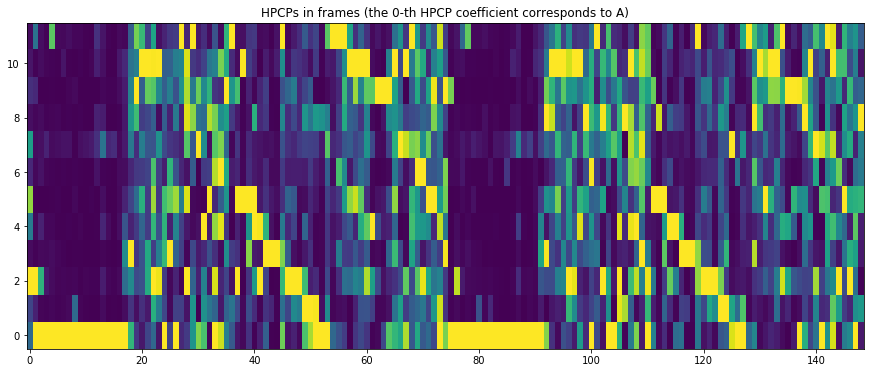

Estimated key and scale: A minor


In [34]:
import essentia.streaming as ess

# Initialize algorithms we will use
loader = ess.MonoLoader(filename='audio/dubstep.flac')
framecutter = ess.FrameCutter(frameSize=4096, hopSize=2048, silentFrames='noise')
windowing = ess.Windowing(type='blackmanharris62')
spectrum = ess.Spectrum()
spectralpeaks = ess.SpectralPeaks(orderBy='magnitude',
                                  magnitudeThreshold=0.00001,
                                  minFrequency=20,
                                  maxFrequency=3500, 
                                  maxPeaks=60)

# Use default HPCP parameters for plots, however we will need higher resolution 
# and custom parameters for better Key estimation

hpcp = ess.HPCP()
hpcp_key = ess.HPCP(size=36, # we will need higher resolution for Key estimation
                    referenceFrequency=440, # assume tuning frequency is 44100.
                    bandPreset=False,
                    minFrequency=20,
                    maxFrequency=3500,
                    weightType='cosine',
                    nonLinear=False,
                    windowSize=1.)

key = ess.Key(profileType='edma', # Use profile for electronic music
              numHarmonics=4,
              pcpSize=36,
              slope=0.6,
              usePolyphony=True,
              useThreeChords=True)

# Use pool to store data
pool = essentia.Pool() 

# Connect streaming algorithms
loader.audio >> framecutter.signal
framecutter.frame >> windowing.frame >> spectrum.frame
spectrum.spectrum >> spectralpeaks.spectrum
spectralpeaks.magnitudes >> hpcp.magnitudes
spectralpeaks.frequencies >> hpcp.frequencies
spectralpeaks.magnitudes >> hpcp_key.magnitudes
spectralpeaks.frequencies >> hpcp_key.frequencies
hpcp_key.hpcp >> key.pcp
hpcp.hpcp >> (pool, 'tonal.hpcp')
key.key >> (pool, 'tonal.key_key')
key.scale >> (pool, 'tonal.key_scale')
key.strength >> (pool, 'tonal.key_strength')

# Run streaming network
essentia.run(loader)

# Plot HPCP
imshow(pool['tonal.hpcp'].T, aspect='auto', origin='lower', interpolation='none')
plt.title("HPCPs in frames (the 0-th HPCP coefficient corresponds to A)")
show()

print("Estimated key and scale:", pool['tonal.key_key'] + " " + pool['tonal.key_scale'])

## Chords
Essentia provides a few algorithms for chord estimation: 
- [ChordsDetection](https://essentia.upf.edu/documentation/reference/std_ChordsDetection.html): a naive algorithm estimating chords using a sliding window over an input HPCP chromagram 
- [ChordsDetectionBeats](https://essentia.upf.edu/documentation/reference/std_ChordsDetectionBeats.html) similar algorithm, but it estimates chords on segments between consecutive beats
- [ChordsDescriptors](https://essentia.upf.edu/documentation/reference/std_ChordsDescriptors.html) allows to describe the estimated chord progression by means of key, scale, histogram, and rate of change.

In [35]:
# Using a 2 seconds window over HPCP matrix to estimate chords
chords, strength = es.ChordsDetection(hopSize=2048, windowSize=2)(pool['tonal.hpcp'])
print(chords)

['Am', 'Am', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'G', 'G', 'G', 'G', 'Bm', 'Bm', 'Bm', 'D', 'D', 'D', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'D', 'Bm', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'A', 'A', 'A', 'Dm', 'D', 'Dm', 'Dm', 'Dm', 'Dm', 'Dm', 'Dm', 'Dm', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'G', 'G', 'G', 'G', 'G', 'G', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'Bm', 'D', 'D', 'D', 'D', 'D', 'D', 'D']


## Spectrograms representations
Let's compute a typical feature map for deep learning with CNNs: a mel-spectrogram. They are often used instead of original spectrograms because of a lower dimensionality in terms of frequency bins. We will also compute a classic spectrogram as well as a [LogSpectrum](https://essentia.upf.edu/documentation/reference/std_LogSpectrum.html), with a log-frequency scale.

For normalization to a dB scale we are using [UnaryOperator](https://essentia.upf.edu/documentation/reference/std_UnaryOperator.html). It provides many options for scaling values inside vectors.

In [37]:
filename = 'audio/techno_loop.flac'
import IPython
IPython.display.Audio(filename)

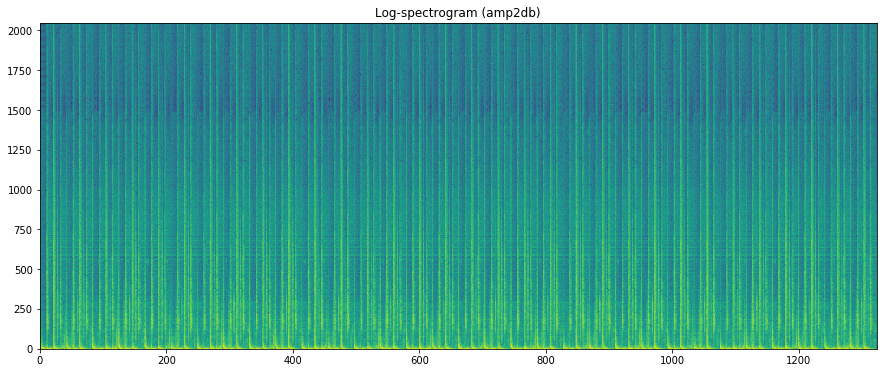

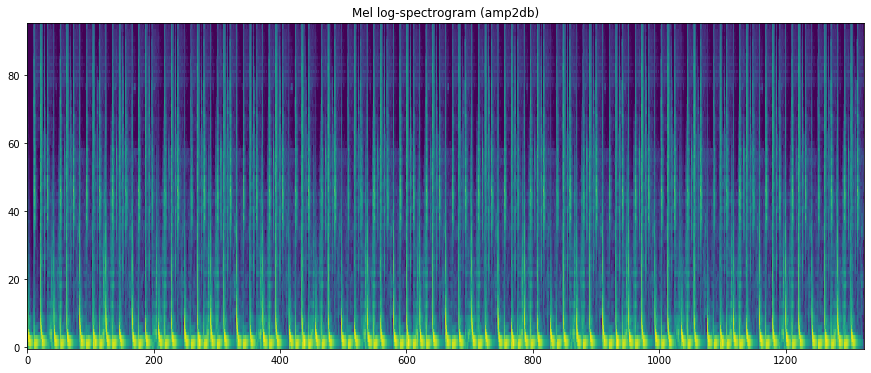

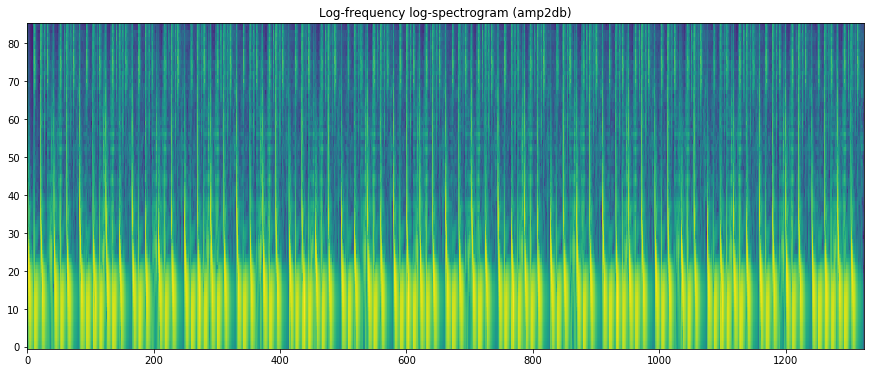

In [39]:
audio = es.MonoLoader(filename=filename)()
windowing = es.Windowing(type='blackmanharris62', zeroPadding=2048)
spectrum = es.Spectrum()
melbands = es.MelBands(numberBands=96, lowFrequencyBound=0, highFrequencyBound=11000)
spectrum_logfreq = es.LogSpectrum(binsPerSemitone=1)

amp2db = es.UnaryOperator(type='lin2db', scale=2)
pool = essentia.Pool()

for frame in es.FrameGenerator(audio, frameSize=2048, hopSize=1024):
    frame_spectrum = spectrum(windowing(frame))
    frame_mel = melbands(frame_spectrum)
    frame_spectrum_logfreq, _, _ = spectrum_logfreq(frame_spectrum)
    
    pool.add('spectrum_db', amp2db(frame_spectrum))
    pool.add('mel96_db', amp2db(frame_mel))
    pool.add('spectrum_logfreq_db', amp2db(frame_spectrum_logfreq))

imshow(pool['spectrum_db'].T, aspect = 'auto', origin='lower', interpolation='none')
plt.title("Log-spectrogram (amp2db)")
show()

imshow(pool['mel96_db'].T, aspect = 'auto', origin='lower', interpolation='none')
plt.title("Mel log-spectrogram (amp2db)")
show()

imshow(pool['spectrum_logfreq_db'].T, aspect = 'auto', origin='lower', interpolation='none')
plt.title("Log-frequency log-spectrogram (amp2db)")
show()

## Loudness and envelope descriptors
In this example we compute a few features that can be used to describe the envelope and loudness of an audio signal. Essentia contains algorithms for basic loudness computation as well as the most up-to-date loudness starndard in broadcasting, EBU R128.

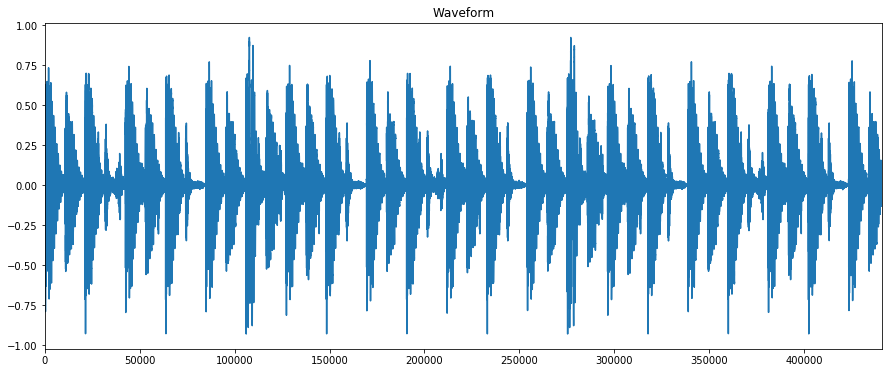

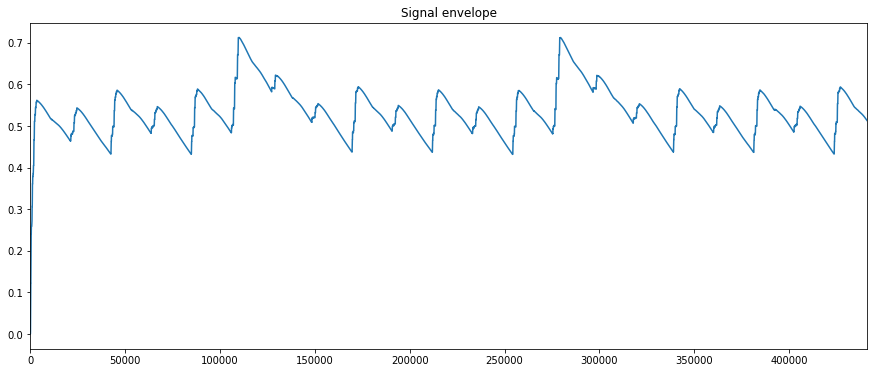

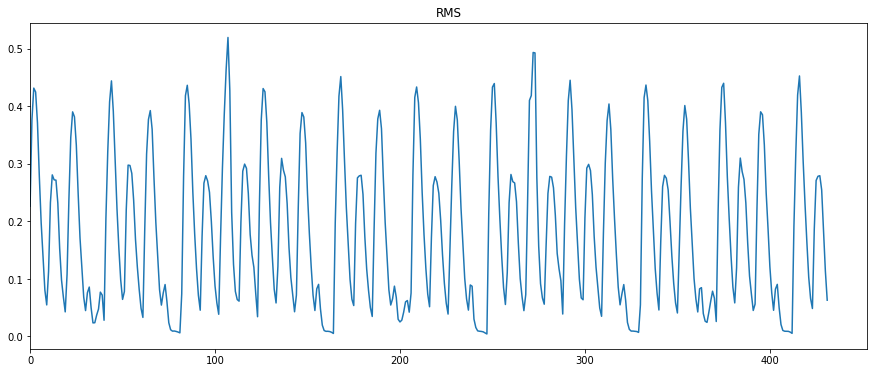

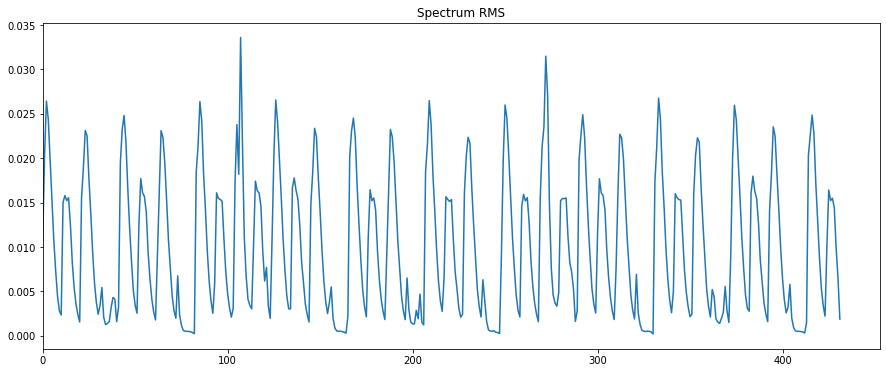

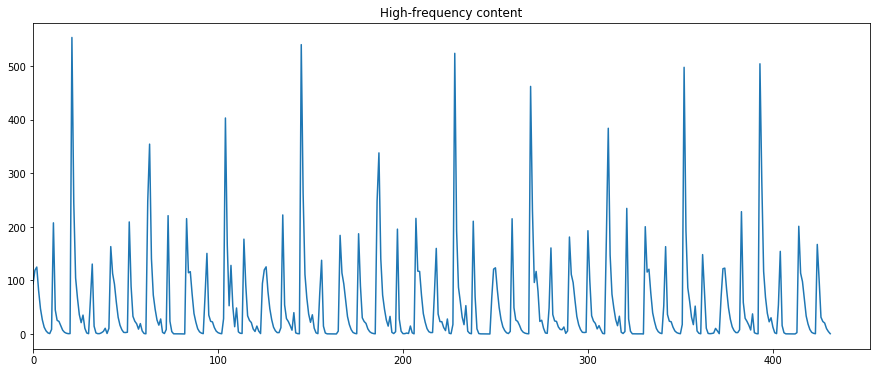

In [40]:
# Let's load only the first 10 second of audio this time
SEGMENT_LENGTH = 10
audio = es.EasyLoader(filename=filename, startTime=0, endTime=SEGMENT_LENGTH)()
pool = essentia.Pool()

rms = es.RMS()
hfc = es.HFC()

for frame in es.FrameGenerator(audio, frameSize=2048, hopSize=1024):
    frame_spectrum = spectrum(windowing(frame))

    pool.add('rms', rms(frame))
    pool.add('rms_spectrum', rms(frame_spectrum))
    pool.add('hfc', hfc(frame_spectrum))
    
plot(audio)
plt.xlim(0, 44100 * SEGMENT_LENGTH)
plt.title("Waveform")
show()

envelope = es.Envelope()
plot(envelope(audio))
plt.xlim(0, 44100 * SEGMENT_LENGTH)
plt.title("Signal envelope")
show()

plot(pool['rms'])
plt.title("RMS")
plt.xlim(0)
show()

plot(pool['rms_spectrum'])
plt.title("Spectrum RMS")
plt.xlim(0)
show()

plot(pool['hfc'])
plt.title("High-frequency content")
plt.xlim(0)
show()

### EBU R28 loudness
Essentia provides the [LoudnessEBUR128](https://essentia.upf.edu/documentation/reference/std_LoudnessEBUR128.html) algorithm which implements a new [common standard in broadcasting](https://en.wikipedia.org/wiki/EBU_R_128). It allows to estimate overall loudness, as well its momentary and short-term fluctuations.


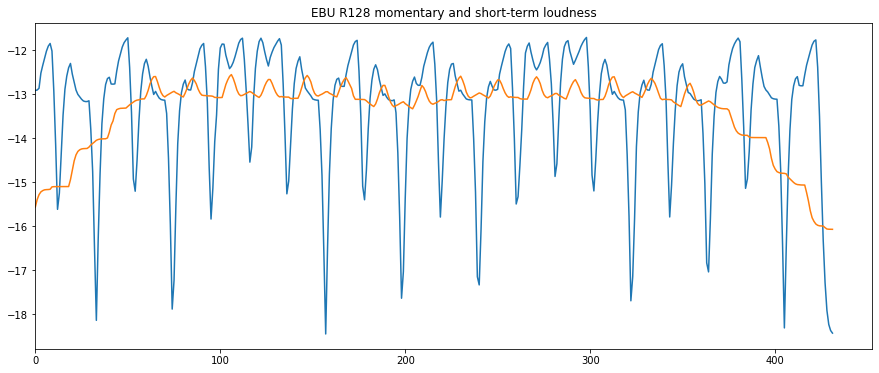

In [41]:
# LoudnessEBUR128 requires stereo in 44100 Hz sample rate
audio_st, _, _, _, _, _ = es.AudioLoader(filename=filename)()
audio_st = es.StereoTrimmer(startTime=0, endTime=SEGMENT_LENGTH)(audio_st)
ebu_momentary, ebu_shortterm, ebu_integrated, dr = es.LoudnessEBUR128(hopSize=1024/44100, startAtZero=True)(audio_st)

plot(ebu_momentary)
plot(ebu_shortterm)
plt.title("EBU R128 momentary and short-term loudness")
plt.xlim(0)
show()

In [42]:
print("Integrated loudness:", ebu_integrated)
print("Dynamic range:", dr)

Integrated loudness: -13.052407264709473
Dynamic range: 2.255620002746582


## Analyzing online streams
To remind you again, we are using FFMpeg. This means we are not limited to audio files, but can also analyze video files, as well as online streaming audio URLs directly.

Here's a hack to analyze youtube videos:

In [45]:
# Install a dependency to grab YouTube links
!pip3 install youtube_dl

In [46]:
from youtube_dl import YoutubeDL
import datetime

youtube_dl_opts = {
'format': 'bestaudio/best',
'quiet': True,
'forceurl': True,
'forcetitle': True
} 

video = "https://www.youtube.com/watch?v=0dgbwSY1Fxg"

with YoutubeDL(youtube_dl_opts) as ydl:
    info_dict = ydl.extract_info(video, download=False)
    video_url = info_dict.get("url", None)
    video_title = info_dict.get('title', None)

print(video_title)
print(video_url)

audio = es.MonoLoader(filename=video_url)()
print('Duration:', str(datetime.timedelta(seconds=len(audio) / 44100.))) 

bpm, _, _, _, _ = es.RhythmExtractor2013()(audio)
print('Estimated BPM: %.2f' % bpm)

Neophyte - I will have that power
https://r3---sn-h5q7dned.googlevideo.com/videoplayback?id=o-AGKB6zlBjZuwwg8gS2i8V1xrLx4vAF_egVIaOf0Mn9E5&itag=251&source=youtube&requiressl=yes&mm=31%2C29&mn=sn-h5q7dned%2Csn-h5q7knes&ms=au%2Crdu&mv=m&pl=20&ei=i8fmXJGoO9mPmLAPnvuf6Ak&initcwndbps=2061250&mime=audio%2Fwebm&gir=yes&clen=3973024&dur=282.421&lmt=1540213031994071&mt=1558628107&fvip=3&keepalive=yes&c=WEB&txp=5411222&ip=84.89.157.13&ipbits=0&expire=1558649836&sparams=ip%2Cipbits%2Cexpire%2Cid%2Citag%2Csource%2Crequiressl%2Cmm%2Cmn%2Cms%2Cmv%2Cpl%2Cei%2Cinitcwndbps%2Cmime%2Cgir%2Cclen%2Cdur%2Clmt&key=yt8&signature=80C271E44966E6E4FD47EAF052F6A1E248A7047F.385585845678A5E03A13AA1E4060B44C5A670FE2&ratebypass=yes
Duration: 0:04:42.407596
Estimated BPM: 172.27
